<a href="https://colab.research.google.com/github/mahault/Multi-agent-shared-representation-layer-by-Hayashi/blob/main/multi_agent_regularization_based_on_hayashi_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

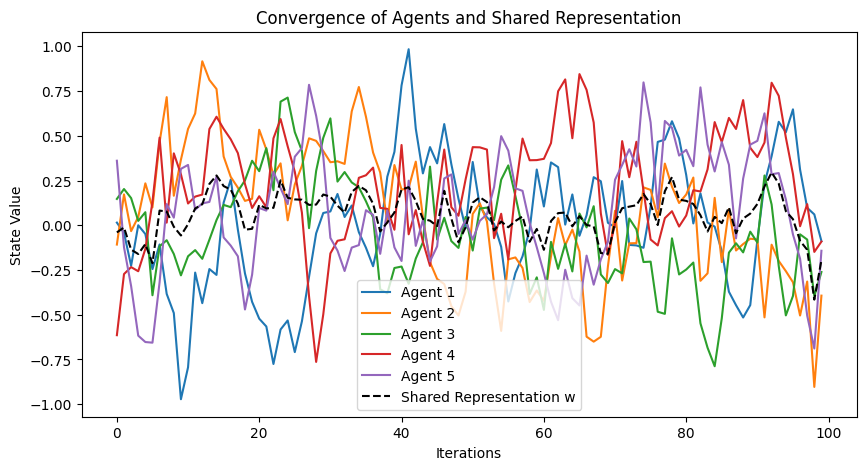

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_agents = 5      # Number of agents
num_iterations = 100  # Number of iterations

# Initialize states
z = np.random.randn(num_agents)  # Internal belief states
w = np.random.randn()            # Shared representation

# Learning rates
alpha = 0.1  # Individual adaptation
beta = 0.05  # Collective regularization

def free_energy(z_k, w, o_k):
    """Compute free energy for an agent."""
    prediction_error = (o_k - z_k)**2  # Prediction error
    collective_reg = (w - z_k)**2      # Collective regularization
    return prediction_error + beta * collective_reg

# Simulation loop
history = []
for t in range(num_iterations):
    observations = np.random.randn(num_agents)  # Simulated observations

    # Agents update their internal states z_k
    for k in range(num_agents):
        fe_grad = -2 * (observations[k] - z[k]) + beta * 2 * (w - z[k])  # Gradient of free energy
        z[k] -= alpha * fe_grad  # Update using gradient descent

    # Update shared representation w
    w = np.mean(z)  # Shared representation as the mean of individual beliefs

    history.append((z.copy(), w))

# Plot results
plt.figure(figsize=(10, 5))
for k in range(num_agents):
    plt.plot([h[0][k] for h in history], label=f'Agent {k+1}')
plt.plot([h[1] for h in history], 'k--', label='Shared Representation w')
plt.xlabel('Iterations')
plt.ylabel('State Value')
plt.title('Convergence of Agents and Shared Representation')
plt.legend()
plt.show()


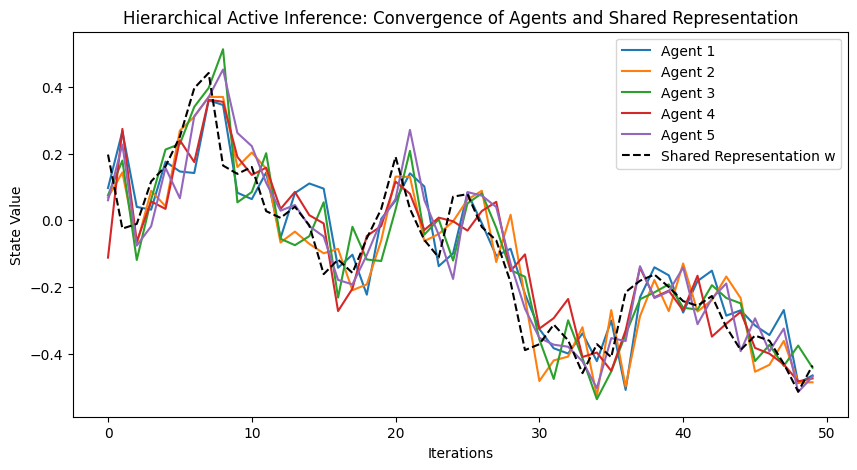

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_agents = 5      # Number of agents
num_iterations = 50  # Number of iterations

# Initialize states
z = np.random.randn(num_agents)  # Internal belief states
w = np.random.randn()            # Shared representation

# Learning rates
alpha = 0.1  # Individual adaptation
beta = 0.05  # Collective regularization

def free_energy(z_k, w, o_k):
    """Compute free energy for an agent."""
    prediction_error = (o_k - z_k)**2  # Prediction error
    collective_reg = (w - z_k)**2      # Collective regularization
    return prediction_error + beta * collective_reg

def expected_free_energy(z_k, a_k, w):
    """Compute expected free energy for action selection."""
    return (w - (z_k + a_k))**2  # Minimizing uncertainty in shared representation

def select_action(z_k, w):
    """Select action to minimize expected free energy."""
    actions = np.linspace(-1, 1, 10)  # Discrete action space
    return min(actions, key=lambda a: expected_free_energy(z_k, a, w))

# Simulation loop
history = []
for t in range(num_iterations):
    observations = np.random.randn(num_agents)  # Simulated observations
    actions = np.zeros(num_agents)  # Initialize actions

    # Agents update their internal states z_k
    for k in range(num_agents):
        fe_grad = -2 * (observations[k] - z[k]) + beta * 2 * (w - z[k])  # Gradient of free energy
        z[k] -= alpha * fe_grad  # Update using gradient descent
        actions[k] = select_action(z[k], w)  # Select action
        z[k] += actions[k]  # Apply action influence

    # Update shared representation w using hierarchical inference
    w = np.mean(z) + np.random.randn() * 0.1  # Adding noise to simulate dynamic adaptation

    history.append((z.copy(), w))

# Plot results
plt.figure(figsize=(10, 5))
for k in range(num_agents):
    plt.plot([h[0][k] for h in history], label=f'Agent {k+1}')
plt.plot([h[1] for h in history], 'k--', label='Shared Representation w')
plt.xlabel('Iterations')
plt.ylabel('State Value')
plt.title('Hierarchical Active Inference: Convergence of Agents and Shared Representation')
plt.legend()
plt.show()